In [1]:
import pandas as pd
A_a_1=pd.read_csv("[Nut2NHI] data_hw_ver4.csv")
A_a_1_cols=A_a_1.columns

A_a_1_cols_new=['sex','age','ID','year']

for x in A_a_1_cols:
    if x.startswith("HE"):
        A_a_1_cols_new.append(x)
       
A_a_1=A_a_1[A_a_1_cols_new]



In [2]:
#B:replace nan with avg in remainders of features
A_a_1=A_a_1.fillna(A_a_1.mean()['HE_ht':'HE_Upro'])
A_a_1=A_a_1.fillna(A_a_1.mean()['HE_glu':'HE_HDL_st2'])
A_a_1=A_a_1.fillna(A_a_1.mean()['HE_crea':'HE_alt'])
#c: drop the LDL

A_a_1=A_a_1.drop(["HE_LDL_drct"],axis=1)

#2: abandon nan values in A1bc



In [3]:
import lightgbm 
from lightgbm import LGBMRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


dataset_total=A_a_1
dataset_men=A_a_1[A_a_1['sex']==1]
dataset_women=A_a_1[A_a_1['sex']==2]

target_total=dataset_total["age"]
features_total=dataset_total.drop(["age","ID","year"],axis=1)

target_men=dataset_men["age"]
features_men=dataset_men.drop(["sex","age","ID","year"],axis=1)

target_women=dataset_women["age"]
features_women=dataset_women.drop(["sex","age","ID","year"],axis=1)



In [4]:
plt.rcParams["figure.figsize"] = (5, 5)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.043295
[LightGBM] [Debug] init for col-wise cost 0.000016 seconds, init for row-wise cost 0.003241 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2767
[LightGBM] [Info] Number of data points in the train set: 41310, number of used features: 16
[LightGBM] [Info] Start training from score 40.899395
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 306 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 248 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 231 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 201 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 224 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 210 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 205 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 209 and depth = 9
[LightGBM] [W

Text(0, 0.5, 'predict')

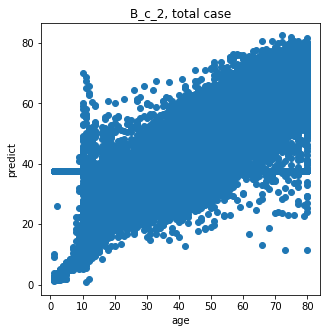

In [5]:


total_x_train, total_x_test, total_y_train, total_y_test= train_test_split(features_total,target_total,test_size=0.3,random_state=200)

lgb_reg_1 = LGBMRegressor(verbosity=50,learning_rate=0.05,boosting='gbdt',metric='regression_l2',max_depth=9,num_leaves=512,n_estimators=100) 
lgb_reg_1.fit(total_x_train, total_y_train)

answer = pd.DataFrame(total_y_test.reset_index())
del answer["index"]

plt.scatter(answer,lgb_reg_1.predict(total_x_test))
plt.title("B_c_2, total case")
plt.xlabel("age")
plt.ylabel("predict")

Text(0.5, 0, 'LgihtGBM Feature of total Importance in B_c_2')

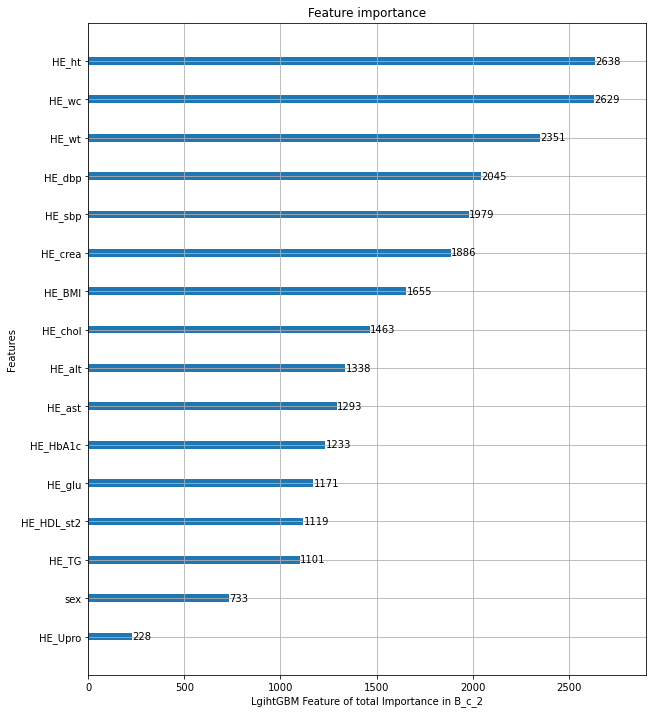

In [6]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_reg_1, ax=ax)
plt.xlabel("LgihtGBM Feature of total Importance in B_c_2")

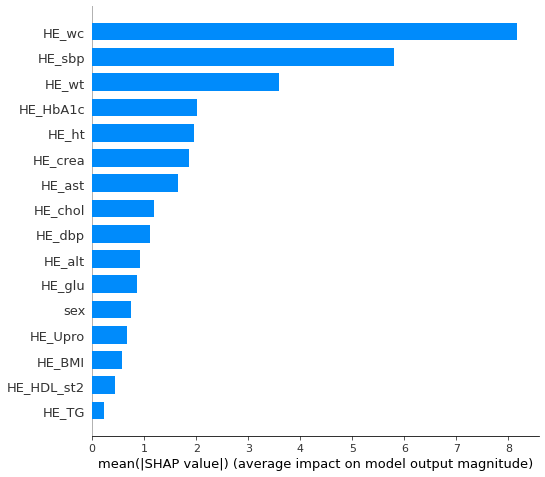

In [7]:
import shap

shap_values = shap.TreeExplainer(lgb_reg_1).shap_values(total_x_test)
shap.summary_plot(shap_values, total_x_test, plot_type="bar")

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.045741
[LightGBM] [Debug] init for col-wise cost 0.000006 seconds, init for row-wise cost 0.001801 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 18809, number of used features: 15
[LightGBM] [Info] Start training from score 39.315806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 238 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 193 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 208 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 160 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 200 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 163 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 168 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 167 and depth = 9
[LightGBM] [W

Text(0, 0.5, 'predict')

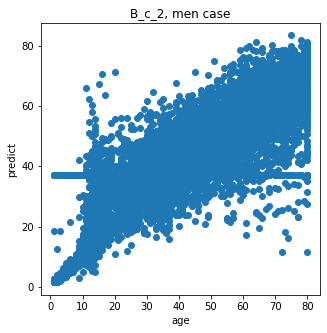

In [8]:
plt.rcParams["figure.figsize"] = (5, 5)

men_x_train, men_x_test, men_y_train, men_y_test= train_test_split(features_men,target_men,test_size=0.3,random_state=200)

lgb_reg_2 = LGBMRegressor(verbosity=50,learning_rate=0.05,boosting='gbdt',metric='regression_l2',max_depth=9,num_leaves=512,n_estimators=100) 
lgb_reg_2.fit(men_x_train, men_y_train)

answer = pd.DataFrame(men_y_test.reset_index())
del answer["index"]

plt.scatter(answer,lgb_reg_2.predict(men_x_test))
plt.title("B_c_2, men case")
plt.xlabel("age")
plt.ylabel("predict")

Text(0.5, 0, 'LgihtGBM Feature of men Importance in B_c_2')

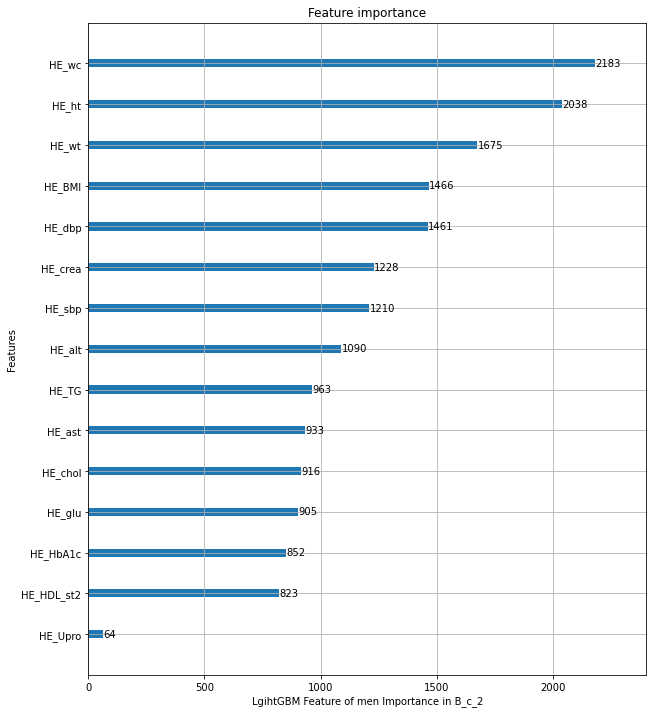

In [9]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_reg_2, ax=ax)
plt.xlabel("LgihtGBM Feature of men Importance in B_c_2")

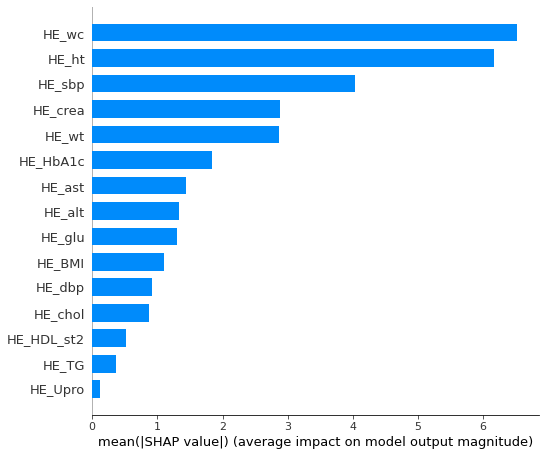

In [10]:
import shap

shap_values = shap.TreeExplainer(lgb_reg_2).shap_values(men_x_test)
shap.summary_plot(shap_values, men_x_test, plot_type="bar")

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.046466
[LightGBM] [Debug] init for col-wise cost 0.000010 seconds, init for row-wise cost 0.003572 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2513
[LightGBM] [Info] Number of data points in the train set: 22501, number of used features: 15
[LightGBM] [Info] Start training from score 42.418915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 285 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 192 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 148 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 146 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 196 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 170 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 129 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 185 and depth = 9
[LightGBM] [W

Text(0, 0.5, 'predict')

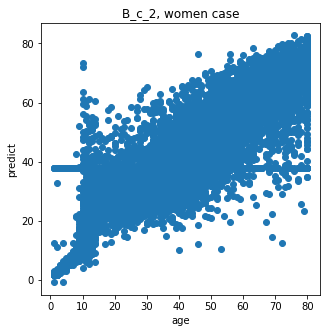

In [11]:
plt.rcParams["figure.figsize"] = (5, 5)

women_x_train, women_x_test, women_y_train, women_y_test= train_test_split(features_women,target_women,test_size=0.3,random_state=200)

lgb_reg_3 = LGBMRegressor(verbosity=50,learning_rate=0.05,boosting='gbdt',metric='regression_l2',max_depth=9,num_leaves=512,n_estimators=100)
lgb_reg_3.fit(women_x_train, women_y_train)

answer = pd.DataFrame(women_y_test.reset_index())
del answer["index"]

plt.scatter(answer,lgb_reg_3.predict(women_x_test))
plt.title("B_c_2, women case")
plt.xlabel("age")
plt.ylabel("predict")

Text(0.5, 0, 'LgihtGBM Feature of women Importance in B_c_2')

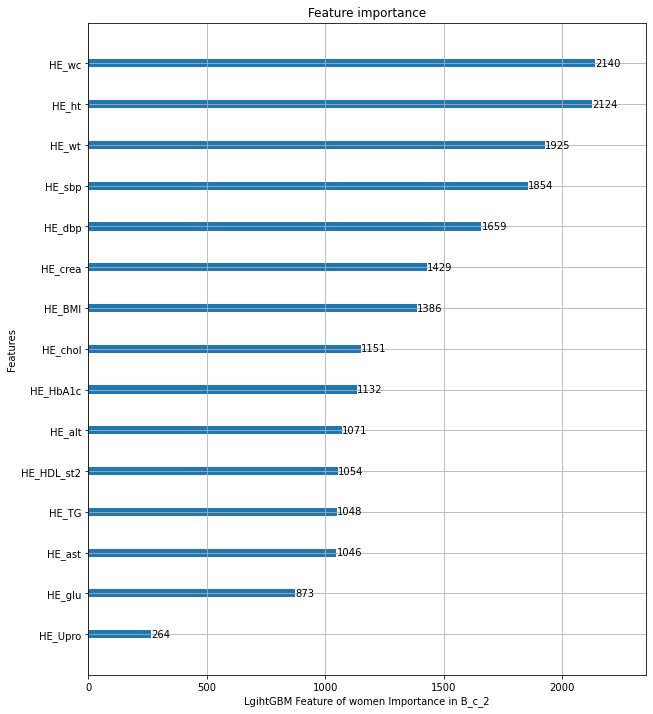

In [12]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_reg_3, ax=ax)
plt.xlabel("LgihtGBM Feature of women Importance in B_c_2")

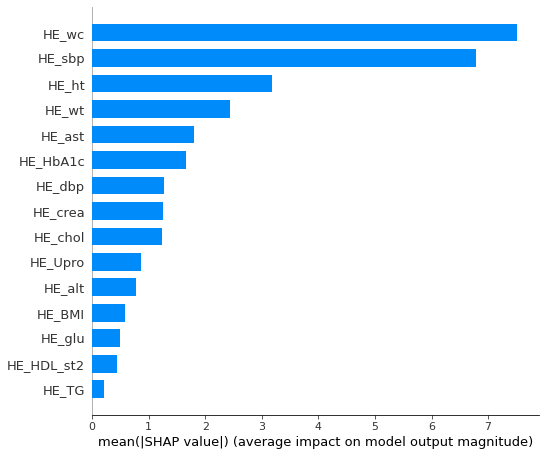

In [13]:
import shap

shap_values = shap.TreeExplainer(lgb_reg_3).shap_values(women_x_test)
shap.summary_plot(shap_values, women_x_test, plot_type="bar")